<a href="https://colab.research.google.com/github/Aadya-Anil/SAP-Log-anomaly-detection/blob/main/SAP_anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Upload the Python script and CSV log file
uploaded = files.upload()


Saving sample_sap_logs.csv to sample_sap_logs.csv


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_log_data(filepath):
    df = pd.read_csv(filepath, parse_dates=['Timestamp'])

    df['hour'] = df['Timestamp'].dt.hour
    df['minute'] = df['Timestamp'].dt.minute
    df['dayofweek'] = df['Timestamp'].dt.dayofweek

    for col in ['LogType', 'Severity', 'Message']:
        df[col] = LabelEncoder().fit_transform(df[col])

    return df[['hour', 'minute', 'dayofweek', 'LogType', 'Severity', 'Message']]


In [4]:
from sklearn.ensemble import IsolationForest

def detect_anomalies(df):
    model = IsolationForest(contamination=0.05, random_state=42)
    model.fit(df)
    df['anomaly'] = model.predict(df)
    anomalies = df[df['anomaly'] == -1]
    return anomalies


In [5]:
import matplotlib.pyplot as plt

def plot_anomalies(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Severity'], label='Severity')
    plt.scatter(df[df['anomaly'] == -1].index,
                df[df['anomaly'] == -1]['Severity'],
                color='red', label='Anomaly')
    plt.legend()
    plt.title("SAP Log Severity with Anomalies")
    plt.xlabel("Index")
    plt.ylabel("Severity")
    plt.tight_layout()
    plt.show()



🔍 Detected Anomalies:
   hour  minute  dayofweek  LogType  Severity  Message  anomaly
2     9      27          3        1         2        5       -1


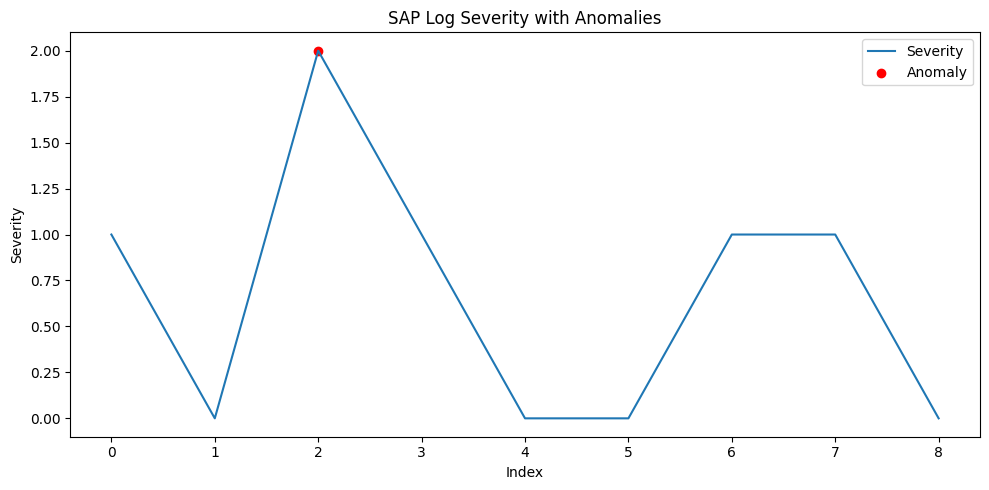

In [6]:
# Replace this with your actual uploaded filename
filename = 'sample_sap_logs.csv'

df = preprocess_log_data(filename)
anomalies = detect_anomalies(df)

print("\n🔍 Detected Anomalies:")
print(anomalies)

plot_anomalies(df)
